In [112]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
data = pd.read_csv('D:/aiml/delivery.csv')
data

,n.prod,distance,delTime
0,7,560,NaN
1,3,220,NaN
2,3,340,NaN
3,4,80,NaN
4,6,150,NaN
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   14 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


# 

In [115]:
data.isnull()

,n.prod,distance,delTime
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [117]:
data=data.drop('delTime',axis=1)
data

,n.prod,distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
8,30,1460
9,5,605


In [118]:
data.dropna()

,n.prod,distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
8,30,1460
9,5,605


In [119]:
data.fillna(0)

,n.prod,distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
8,30,1460
9,5,605


In [122]:
data['distance'].fillna(data['distance'].mean(),inplace=True)
data

,n.prod,distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
8,30,1460
9,5,605


Normalization

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data[['n.prod','distance']]) 

data_normalized = scaler.transform(data[['n.prod','distance']]) 

data_normalized


array([[-0.26102763,  0.47304302],
       [-0.85427226, -0.5940657 ],
       [-0.85427226, -0.2174391 ],
       [-0.7059611 , -1.03346341],
       [-0.40933879, -0.81376456],
       [-0.26102763, -0.24882465],
       [-1.00258342, -0.93930676],
       [-0.26102763, -0.62545125],
       [ 3.15012896,  3.29774258],
       [-0.55764995,  0.614278  ],
       [ 1.07377277,  0.87477807],
       [ 0.18390583, -0.60975848],
       [-0.7059611 , -0.48421628],
       [-0.40933879,  0.16546462],
       [ 0.03559468,  0.12152485],
       [ 0.18390583,  1.15097092],
       [-0.40933879, -0.65683681],
       [-0.26102763, -0.87025855],
       [-0.85427226, -1.17155984],
       [ 1.22208393,  1.13213959],
       [ 0.18390583, -0.84515011],
       [ 2.55688433,  1.25768179],
       [ 0.03559468,  0.12780196],
       [-0.11271648,  0.70843465],
       [-0.7059611 , -0.81376456]])

In [124]:
data_normalized=pd.DataFrame(data_normalized,columns=['n.prod','distance'])
data_normalized=data_normalized.join(data[data.columns.drop(['n.prod','distance'])])
data_normalized


,n.prod,distance
0,-0.261028,0.473043
1,-0.854272,-0.594066
2,-0.854272,-0.217439
3,-0.705961,-1.033463
4,-0.409339,-0.813765
5,-0.261028,-0.248825
6,-1.002583,-0.939307
7,-0.261028,-0.625451
8,3.150129,3.297743
9,-0.557650,0.614278


#encoding

In [125]:
cat_features = ['n.prod','distance']
data_df = pd.get_dummies(data,columns=cat_features)
print(data.columns)

Index(['n.prod', 'distance'], dtype='object')


#hist

(array([7., 5., 5., 2., 2., 3., 0., 0., 0., 1.]),
 array([  36. ,  178.4,  320.8,  463.2,  605.6,  748. ,  890.4, 1032.8,
        1175.2, 1317.6, 1460. ]),
 <BarContainer object of 10 artists>)

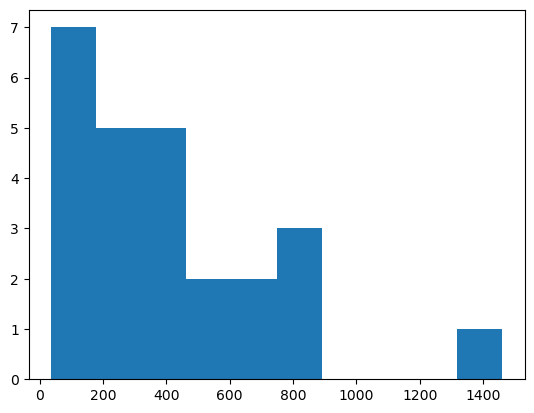

In [126]:
plt.hist(data['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x119d65462e0>,
 'caps': [<matplotlib.lines.Line2D at 0x119d6546880>,
 'boxes': [<matplotlib.lines.Line2D at 0x119d6537fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x119d6546e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x119d6555130>],
 'means': []}

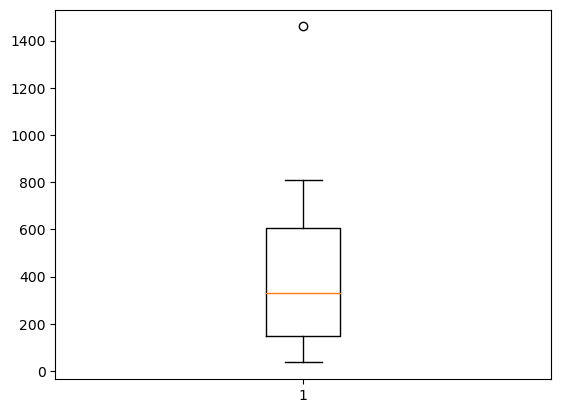

In [127]:
plt.boxplot(data['distance'])

#REMOVE OUTLIER

In [128]:
lowerlimit=data['distance'].quantile(0.05)
lowerlimit

86.0

In [129]:
upperlimit=data['distance'].quantile(0.95)
upperlimit

803.1999999999999

In [130]:
lowerlimit=data['distance'].quantile(0.05)
lowerlimit
data[data['distance']<lowerlimit]

,n.prod,distance
3,4,80
18,3,36


In [131]:
upperlimit=data['distance'].quantile(0.95)
upperlimit
data[data['distance']<upperlimit]

,n.prod,distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
9,5,605
10,16,688


{'whiskers': [<matplotlib.lines.Line2D at 0x119d7582550>,
 'caps': [<matplotlib.lines.Line2D at 0x119d7582af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x119d7582280>],
 'medians': [<matplotlib.lines.Line2D at 0x119d75900d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x119d75903a0>],
 'means': []}

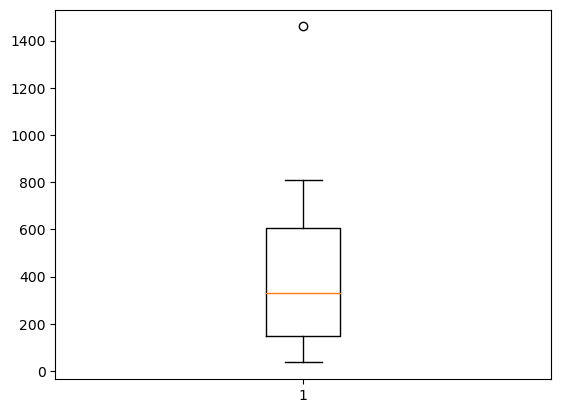

In [132]:
plt.boxplot(data['distance'])

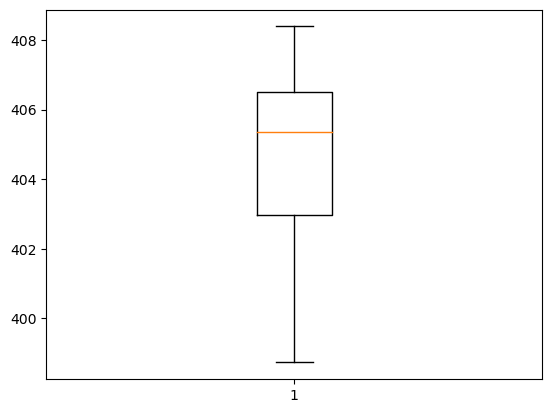

In [142]:
for i in data['distance']:
    q1=data['distance'].quantile(0.25)
    q3=data['distance'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    if i>upper_tail or i< lower_tail:
        data['distance']=data['distance'].replace(i,np.mean(data['distance']))
plt.boxplot(data['distance'])
plt.show()

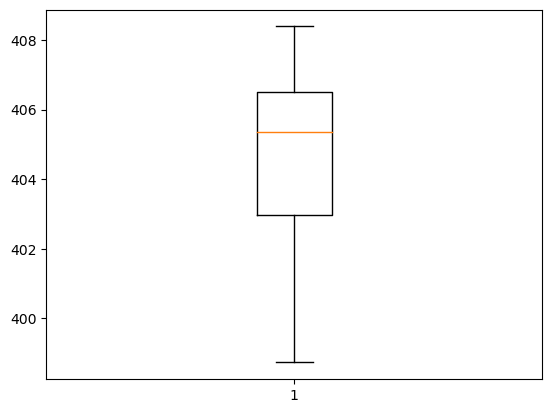

In [143]:
for i in data['distance']:
    q1=data['distance'].quantile(0.25)
    q3=data['distance'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    if i>upper_tail or i< lower_tail:
        data['distance']=data['distance'].drop(i)
plt.boxplot(data['distance'])
plt.show()

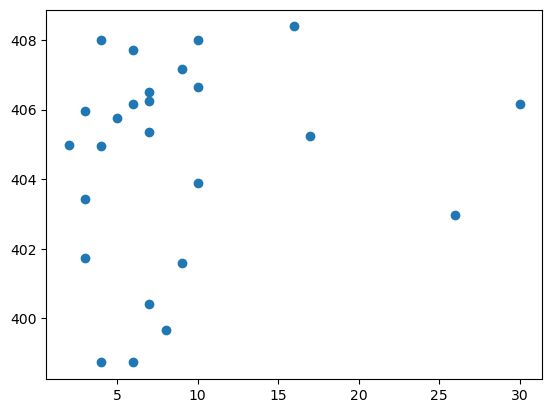

In [145]:
plt.scatter(data['n.prod'],data['distance'])

In [155]:
data['bins']=pd.cut(x=data['distance'],bins=[1, 20, 40, 60, 80, 100])
print(data)
print(data['bins'].unique())

    n.prod    distance bins
0        7  400.419156  NaN
1        3  401.745874  NaN
2        3  403.434059  NaN
3        4  404.966505  NaN
4        6  398.726842  NaN
5        7  405.345855  NaN
6        2  404.984382  NaN
7        7  406.520053  NaN
8       30  406.149035  NaN
9        5  405.753817  NaN
10      16  408.391003  NaN
11      10  407.995014  NaN
12       4  408.014721  NaN
13       6  407.727212  NaN
14       9  407.171878  NaN
15      10  406.658955  NaN
16       6  406.170322  NaN
17       7  406.233545  NaN
18       3  405.971953  NaN
19      17  405.250659  NaN
20      10  403.879707  NaN
21      26  402.982678  NaN
22       9  401.591680  NaN
23       8  399.655347  NaN
24       4  398.726842  NaN
[NaN]
Categories (5, interval[int64, right]): [(1, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]


In [157]:
data['bins']=pd.cut(x=data['n.prod'],bins=[1, 20, 40, 60, 80, 100],
                   labels=['1 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100'])
print(data)
print(data['bins'].unique())

    n.prod    distance      bins
0        7  400.419156   1 to 20
1        3  401.745874   1 to 20
2        3  403.434059   1 to 20
3        4  404.966505   1 to 20
4        6  398.726842   1 to 20
5        7  405.345855   1 to 20
6        2  404.984382   1 to 20
7        7  406.520053   1 to 20
8       30  406.149035  21 to 40
9        5  405.753817   1 to 20
10      16  408.391003   1 to 20
11      10  407.995014   1 to 20
12       4  408.014721   1 to 20
13       6  407.727212   1 to 20
14       9  407.171878   1 to 20
15      10  406.658955   1 to 20
16       6  406.170322   1 to 20
17       7  406.233545   1 to 20
18       3  405.971953   1 to 20
19      17  405.250659   1 to 20
20      10  403.879707   1 to 20
21      26  402.982678  21 to 40
22       9  401.591680   1 to 20
23       8  399.655347   1 to 20
24       4  398.726842   1 to 20
['1 to 20', '21 to 40']
Categories (5, object): ['1 to 20' < '21 to 40' < '41 to 60' < '61 to 80' < '81 to 100']
